In [21]:
#!/usr/bin/env python3
# coding: utf-8

# Experimentally determining the statistics of the running-time of 
# picking the k-th smallest number in an unordered/unsorted list of numbers
# using randomly selected, m-many pivots; followed by a recursion on the 
# shorter of the m-many sub-lists that contains the k-th smallest element
#
# IE531: Algorithms for Data Analytics
# Written by Prof. R.S. Sreenivas
#

import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt

sys.setrecursionlimit(3000)

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k-1]

def randomized_select_with_multipe_pivots (current_array, k, no_of_pivots) :
    if (len(current_array) <= 5):
        # just use any method to pick the k-th smallest element in the array
        # I am using the sort-and-select method here
        return sort_and_select(current_array, k)
    else:
        # I need this array to recurse on
        recursion_array = []
        
        # First Randomly select no_of_pivots
        random_pivots = np.random.choice(current_array, no_of_pivots)
        
        # Divide the original array into 3 subgroubs and the iterate ove all the random pivots 
        for p in random_pivots:
            # Empty list/arrays to keep the rest of the elements depending on the random pivots
            array_smaller_than_p = []
            array_equal_to_p = []
            array_greater_than_p = []
            
            # condition to fill the above arrays
            for element in current_array:
                if element < p:
                    array_smaller_than_p.append(p)
                elif element == p:
                    array_equal_to_p.append(p)
                else:
                    array_greater_than_p.append(p)
            # After this step, we have to check where the kth smallest element lies
            # Best case: When the kth smallest is not in the smaller array but in the array equal to the p
            if ((k > len(array_smaller_than_p)) and (k <= (len(array_smaller_than_p) + len(array_equal_to_p)))): 
                return(p)
            else:
                if (len(recursion_array) == 0):
                    if (k <= len(array_smaller_than_p)):
                        recursion_array = array_smaller_than_p
                        new_k = k 
                    else:
                        recursion_array = array_greater_than_p
                        new_k = k - len(array_smaller_than_p) - len(array_equal_to_p)
                else:
                    if ((k <= len(array_smaller_than_p)) and (len(array_smaller_than_p) < len(recursion_array))):
                        recursion_array = array_smaller_than_p
                        new_k = k 
                    elif ((k > len(array_smaller_than_p) + len(array_equal_to_p)) and 
                        (len(array_greater_than_p) < len(recursion_array))):
                        recursion_array = array_greater_than_p
                        new_k = k - len(array_smaller_than_p) - len(array_equal_to_p)
            return randomized_select_with_multipe_pivots(recursion_array, new_k, no_of_pivots)
                



#Pivots =  1 ; Mean-Regressor's slope =  6.141465111208737e-07 ; Std-Dev-Regressor's slope =  2.3191781573524705e-08
#Pivots =  2 ; Mean-Regressor's slope =  6.36558538744079e-07 ; Std-Dev-Regressor's slope =  8.211104274830029e-08
#Pivots =  3 ; Mean-Regressor's slope =  7.127845358292122e-07 ; Std-Dev-Regressor's slope =  1.920176906129653e-07
#Pivots =  4 ; Mean-Regressor's slope =  6.986133899217126e-07 ; Std-Dev-Regressor's slope =  8.014697536998849e-08
#Pivots =  5 ; Mean-Regressor's slope =  6.610392931874836e-07 ; Std-Dev-Regressor's slope =  9.474601908049395e-08
#Pivots =  6 ; Mean-Regressor's slope =  6.481678306259048e-07 ; Std-Dev-Regressor's slope =  8.967513703279174e-08
#Pivots =  7 ; Mean-Regressor's slope =  6.551387741901049e-07 ; Std-Dev-Regressor's slope =  9.473925875801943e-08
#Pivots =  8 ; Mean-Regressor's slope =  6.38709810532007e-07 ; Std-Dev-Regressor's slope =  6.659294699590084e-08
#Pivots =  9 ; Mean-Regressor's slope =  6.577963568218119e-07 ; Std-Dev-

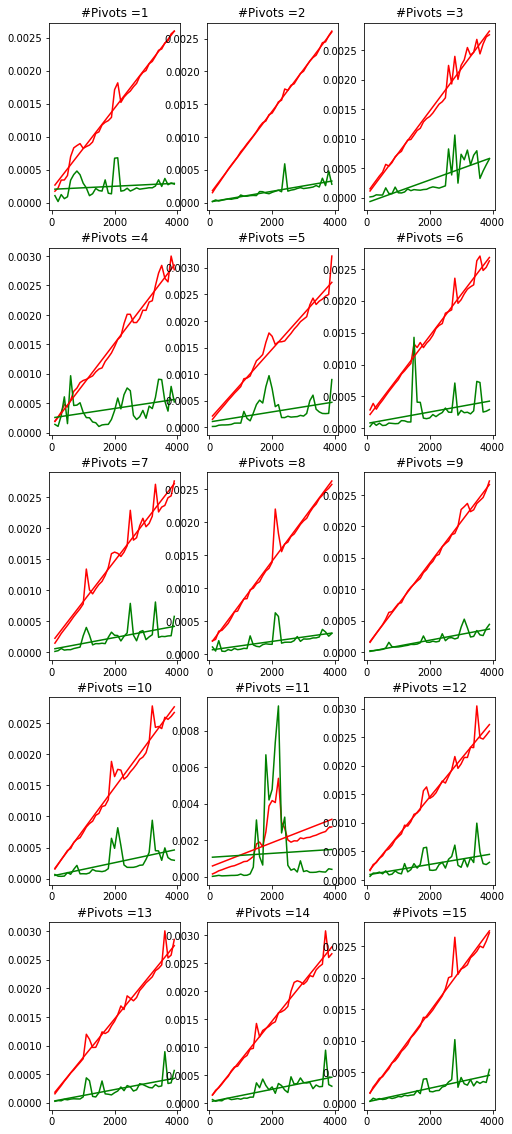

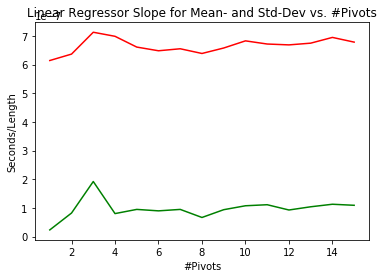

Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    =  2.113729770991389e-09
Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots =  1.707655413217149e-09


In [22]:
# Maximum #pivots
max_no_of_pivots = 15

# Number of Trials
number_of_trials = 1000

# We are going to see if there is any observable difference in the slope of the Linear Regressor
# for the Mean (resp. Standard-Deviation) of the Running Time 
# and the slope of standard-deviation-regressor as the number of pivots are increased
slope_of_mean_regressor_as_a_function_of_no_of_pivots = []
slope_of_std_dev_regressor_as_a_function_of_no_of_pivots = []

# I am going to plot a lot of things
# I found the stuff here -- https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html
# to be useful. Instead, I just used what got from here to get the subplots not to get squished down -- 
# https://stackoverflow.com/questions/41530975/set-size-of-subplot-in-matplotlib
fig = plt.figure(figsize=(8, 20))

# try #pivots = 1,2,3,4 and see if having more pivots is helping with the run-time
for number_of_pivots in range(1, max_no_of_pivots+1) :
    
    # arrays containing mean- and std-dev of running time as a function of 
    # array size starting from 100 to 4000 in steps of 100
    mean_running_time = []
    std_dev_running_time = []
        
    # cycle through a bunch of array sizes, where "k" is randomly chosen
    for j in range(1, 40) :
        array_size = 100*j
        # let is pick k to be (close to) the median 
        k = math.ceil(array_size/2)
        # fill the array with random values
        my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

        # run a bunch of random trials and get the algorithm's running time
        running_time = []
        for i in range(1, number_of_trials) :
            t1 = time.time()
            answer1 = randomized_select_with_multipe_pivots(my_array,k,number_of_pivots)
            t2 = time.time()
            running_time.extend([t2-t1])
            # uncomment the lines below to verify the solution of randomized_select_with_pivots
            #answer2 = sort_and_select(my_array, k)
            #if (answer1 != answer2) :
            #    print ("Something went wrong")
            #    exit()

        mean_running_time.extend([np.mean(running_time)])
        std_dev_running_time.extend([np.std(running_time)])

    # linear fit (cf. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)
    t = np.arange(100, 4000, 100)
    z1 = np.polyfit(t, mean_running_time, 1)
    p1 = np.poly1d(z1)
    z2 = np.polyfit(t, std_dev_running_time, 1)
    p2 = np.poly1d(z2)
    
    print("#Pivots = ", number_of_pivots, "; Mean-Regressor's slope = ", z1[0], "; Std-Dev-Regressor's slope = ", z2[0])
    slope_of_mean_regressor_as_a_function_of_no_of_pivots.extend([z1[0]])
    slope_of_std_dev_regressor_as_a_function_of_no_of_pivots.extend([z2[0]])
    
    # plot the mean and standard deviation of the running-time as a function of array-size    
    axs = fig.add_subplot(5, 3, number_of_pivots)
    plt.plot(t, mean_running_time, 'r', t, std_dev_running_time, 'g', t, p1(t), 'r-', t, p2(t), 'g-')
    axs.set_title('#Pivots =' + str(number_of_pivots))

plt.savefig("fig2.pdf", bbox_inches='tight')
plt.show()
                                 
# plot the slope of the two regressors as a function of #pivots
x = [i for i in range(1, max_no_of_pivots+1)]
plt.plot(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 'r', x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 'g')
plt.title('Linear Regressor Slope for Mean- and Std-Dev vs. #Pivots')
plt.xlabel('#Pivots')
plt.ylabel('Seconds/Length')
plt.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

# Checking if increasing the number of pivots is helping with the runtime in any significant manner... 
z3 = np.polyfit(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 1)
z4 = np.polyfit(x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 1)
print("Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    = ", z3[0])
print("Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots = ", z4[0])

